In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from tqdm.notebook import tqdm
np.random.seed(1)

In [ ]:
import tqdm

In [ ]:
paths = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg', recursive = True)

In [ ]:
img = Image.open(paths[0])
img = np.array(img)
plt.imshow(img, cmap = 'bone')

In [ ]:
#orig = np.array([np.asarray(Image.open(img) for img in paths)])

orig = []
for i in paths:
    orig.append(np.array(Image.open(i)))
print('done')

done


In [ ]:
len(orig)

3875

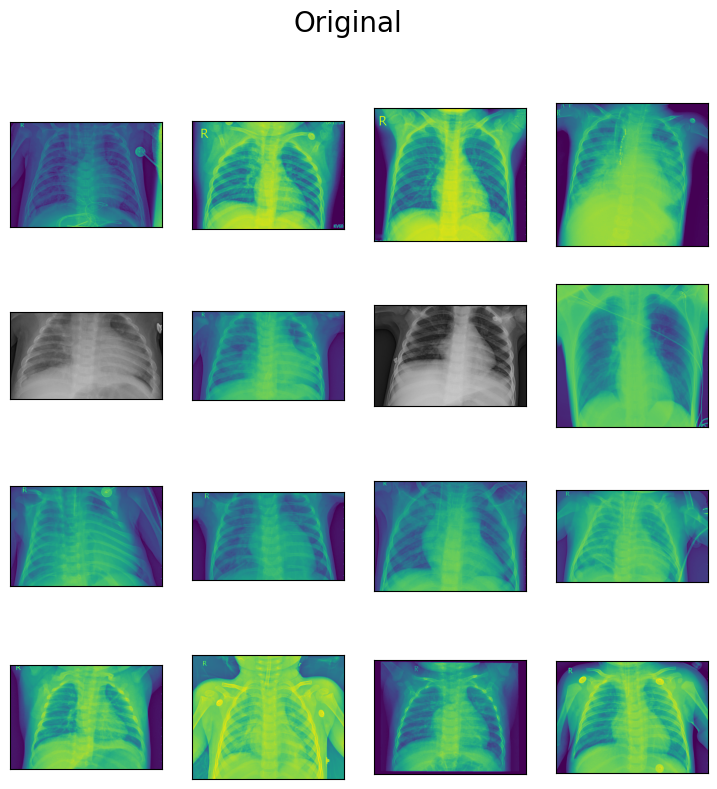

In [ ]:
plt.figure(figsize=(9,9))
for i, img in enumerate(orig[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
plt.suptitle("Original", fontsize=20)
plt.show()

In [ ]:
for i in orig[:15]:
    print(i.shape)

(712, 1024)
(1016, 1424)
(1208, 1376)
(1256, 1336)
(516, 895, 3)
(656, 1120)
(717, 1084, 3)
(1896, 2000)
(568, 856)
(488, 840)
(832, 1144)
(648, 1072)
(768, 1120)
(1152, 1408)
(1044, 1381)


In [ ]:
img = orig[4]
print(img.shape)

new = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )

print(new.shape)

(516, 895, 3)
(516, 895)


In [ ]:
gray = []
for img in orig:
    if len(list(img.shape)) == 3:
        gray.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY ))
    else:
        gray.append(img)

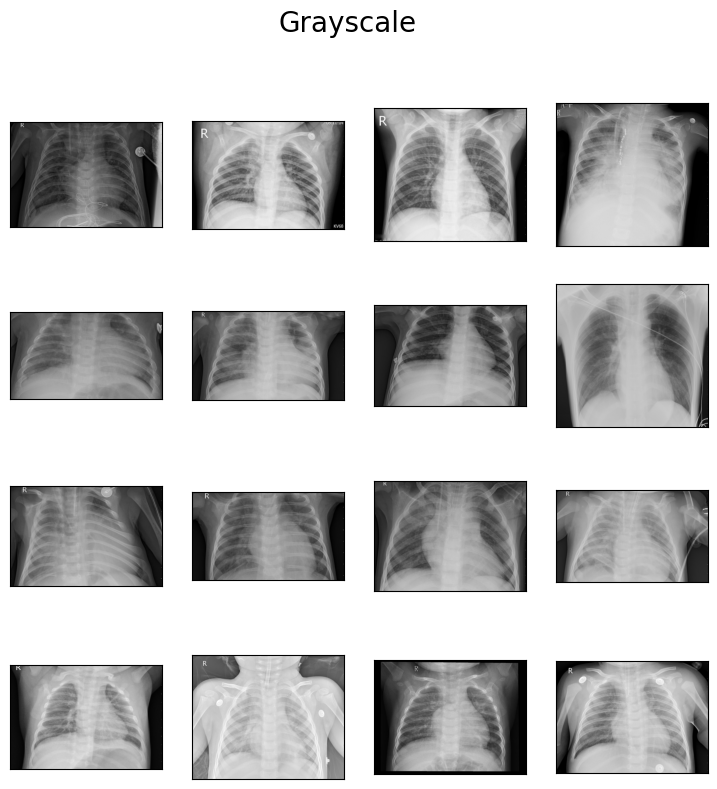

In [ ]:
plt.figure(figsize=(9,9))
for i, img in enumerate(gray[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Grayscale", fontsize=20)
plt.show()

In [ ]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in tqdm.tqdm(gray)]

100%|██████████| 3875/3875 [00:05<00:00, 728.49it/s]


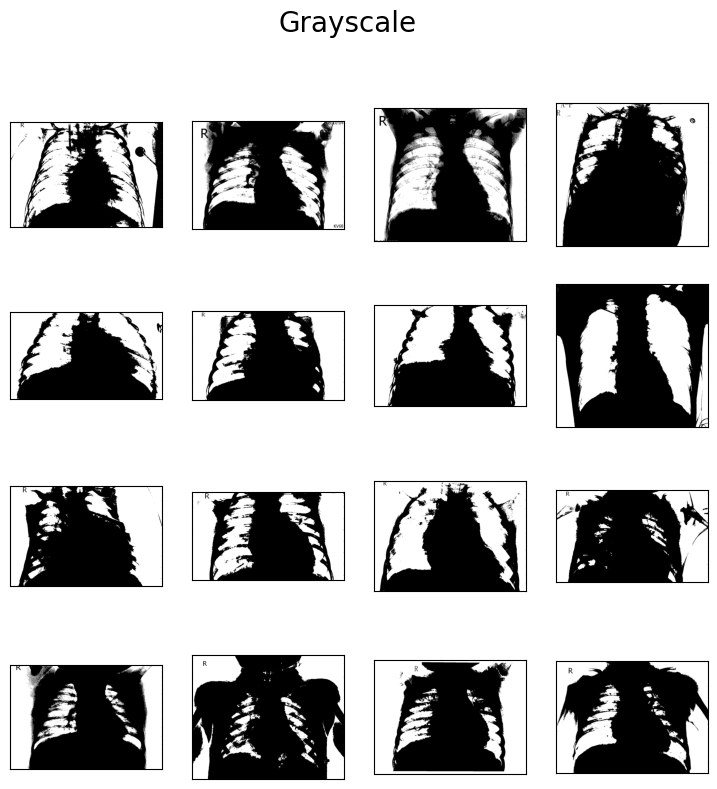

In [ ]:
plt.figure(figsize=(9,9))
for i, img in enumerate(thresh[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Grayscale", fontsize=20)
plt.show()

In [ ]:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in tqdm.tqdm(thresh)]

100%|██████████| 3875/3875 [00:12<00:00, 314.15it/s]


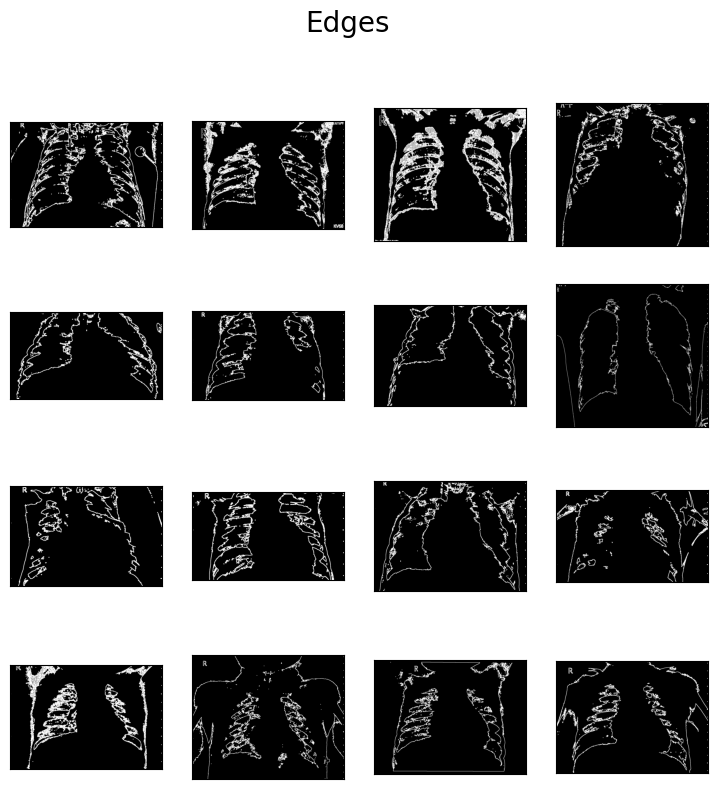

In [ ]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Edges", fontsize=20)
plt.show()

In [ ]:
cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

In [ ]:

mask = np.zeros(orig[0].shape, np.uint8)
dst = cv2.bitwise_and(orig[0], orig[0], mask=mask)

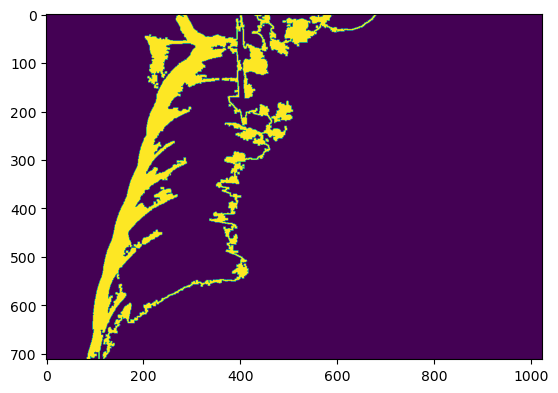

In [ ]:
plt.imshow(cv2.drawContours(mask, [cnt], -1, 255, -1))

In [ ]:
masked = []
segmented = []
for i, img in tqdm.tqdm(enumerate(edges)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros(img.shape, np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(orig[i], orig[i], mask=mask)
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

3875it [00:30, 125.04it/s]


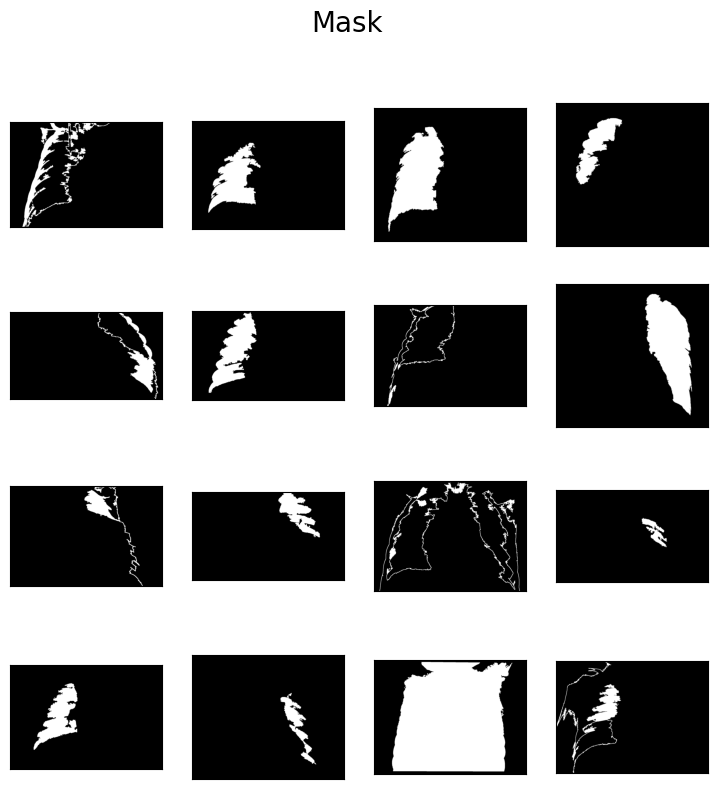

In [ ]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(masked[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()

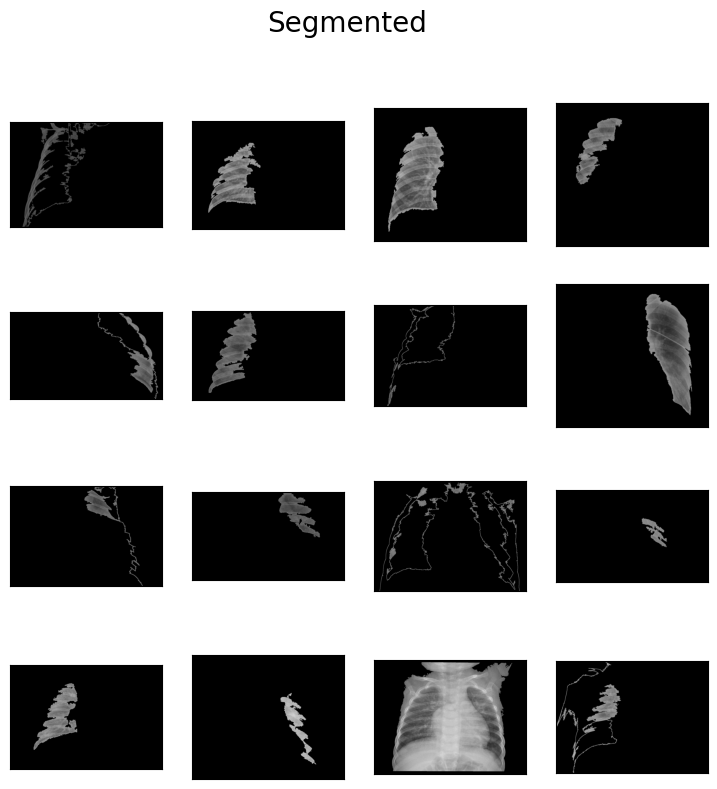

In [ ]:
plt.figure(figsize=(9,9))
for i, segimg in enumerate(segmented[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
plt.suptitle("Segmented", fontsize=20)
plt.show()